In [12]:
import sqlite3
from pathlib import Path

__file__ = %pwd
DATA = Path(__file__).parent.parent / "data"
PRIORITIES = DATA / "Priorities"
DATABASE = DATA / "databases" / "exploration.db"

import sys
sys.path.append(str(DATA.parent))  # Add the parent directory of 'modeling' to the Python path

con = sqlite3.connect(DATABASE)
cur = con.cursor()

In [13]:
import pandas as pd
import numpy as np

df_2016_17 = pd.read_sql_query("SELECT * FROM ACGRWide WHERE Year = '2016-17'", con)
df_2017_18 = pd.read_sql_query("SELECT * FROM ACGRWide WHERE Year = '2017-18'", con)
df_2018_19 = pd.read_sql_query("SELECT * FROM ACGRWide WHERE Year = '2018-19'", con)
df_2019_20 = pd.read_sql_query("SELECT * FROM ACGRWide WHERE Year = '2019-20'", con)
df_2020_21 = pd.read_sql_query("SELECT * FROM ACGRWide WHERE Year = '2020-21'", con)
df_2021_22 = pd.read_sql_query("SELECT * FROM ACGRWide WHERE Year = '2021-22'", con)
df_2022_23 = pd.read_sql_query("SELECT * FROM ACGRWide WHERE Year = '2022-23'", con)
df_2023_24 = pd.read_sql_query("SELECT * FROM ACGRWide WHERE Year = '2023-24'", con)

year_df_mapping = {
    2016: df_2016_17,
    2017: df_2017_18,
    2018: df_2018_19,
    2019: df_2019_20,
    2020: df_2020_21,
    2021: df_2021_22,
    2022: df_2022_23,
    2023: df_2023_24,
}
grad_rate_columns_to_drop = [
    col
    for col in df_2016_17.columns
    if col.startswith("RegHSDiploma")
    or col.startswith("Dropout")
    or col.startswith("UniReqs")
]
csu_rate_columns_to_drop = grad_rate_columns_to_drop

## XGBoost


### Cross-Validated Grad Rate


Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2016-17:
RMSE: 6.7506 ± 0.8689
MAE: 2.8515 ± 0.2834
R^2: 0.7538 ± 0.0795
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2017-18:
RMSE: 5.9502 ± 1.5315
MAE: 2.5518 ± 0.3386
R^2: 0.7610 ± 0.0796
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2018-19:
RMSE: 6.0039 ± 1.8462
MAE: 2.3851 ± 0.2840
R^2: 0.7510 ± 0.0931
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2019-20:
RMSE: 6.3822 ± 0.6822
MAE: 2.5519 ± 0.1415
R^2: 0.7907 ± 0.0537
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2020-21:
RMSE: 6.6535 ± 1.3631
MAE: 2.6254 ± 0.2738
R^2: 0.6278 ± 0.0569
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2021-22:
RMSE: 5.1247 ± 2.3384
MAE: 1.8773 ± 0.2849
R^2: 0.6863 ± 0.1965
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2022-23:
RMSE: 6.1224 ± 0.9602
MAE: 2.2057 ± 0.1383
R^2: 0.6966 ± 0.0460
Cross-Validation Results for RegHSDiplomaRate.TA

<Figure size 1400x600 with 0 Axes>

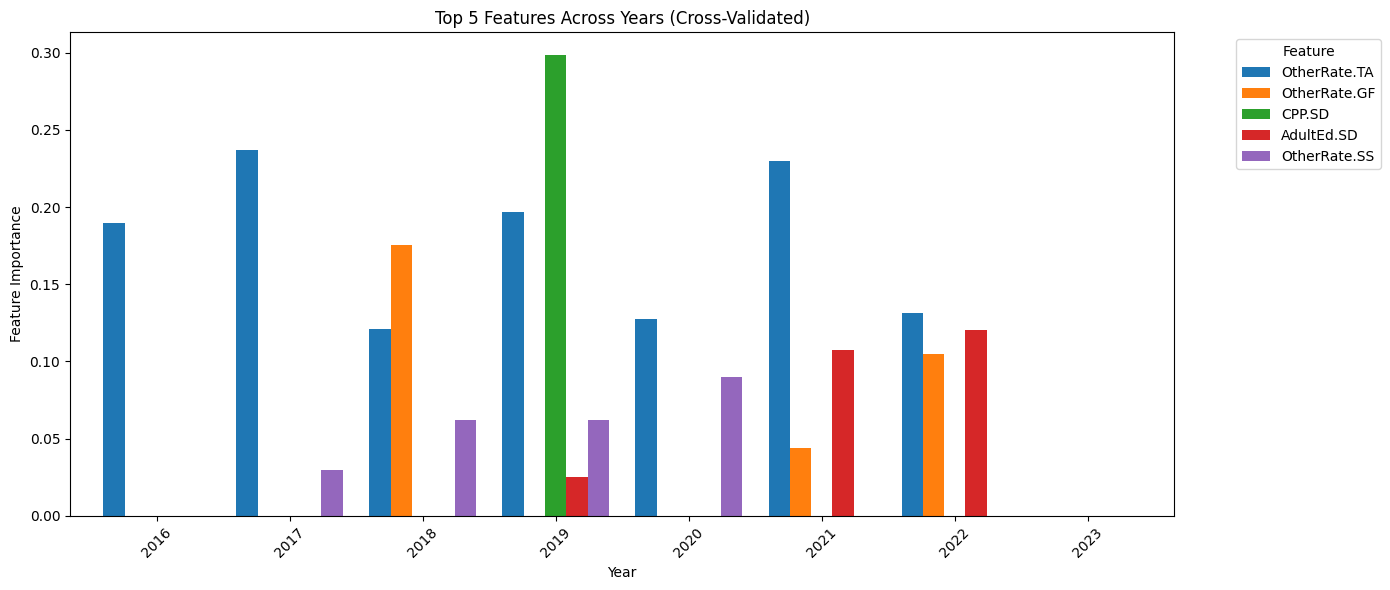

In [14]:
from modeling.utils.xgboost import cross_validate_xgboost, plot_cv_feature_importance
from modeling.utils.xgboost import (
    plot_top_k_features,
    plot_feature_avg_variance,
    plot_feature_time_series,
)

cv_xgb_models = {}

target_column = "RegHSDiplomaRate.TA"

for year, year_df in year_df_mapping.items():

    cv_result = cross_validate_xgboost(
        df=year_df,
        target_column=target_column,
        columns_to_drop=[target_column, "Year"] + grad_rate_columns_to_drop,
        n_splits=5,
        print_results=True,
        n_jobs=-1,
    )

    cv_xgb_models[year] = cv_result

top_features = plot_cv_feature_importance(cv_xgb_models, top_n=5)

<Figure size 1400x600 with 0 Axes>

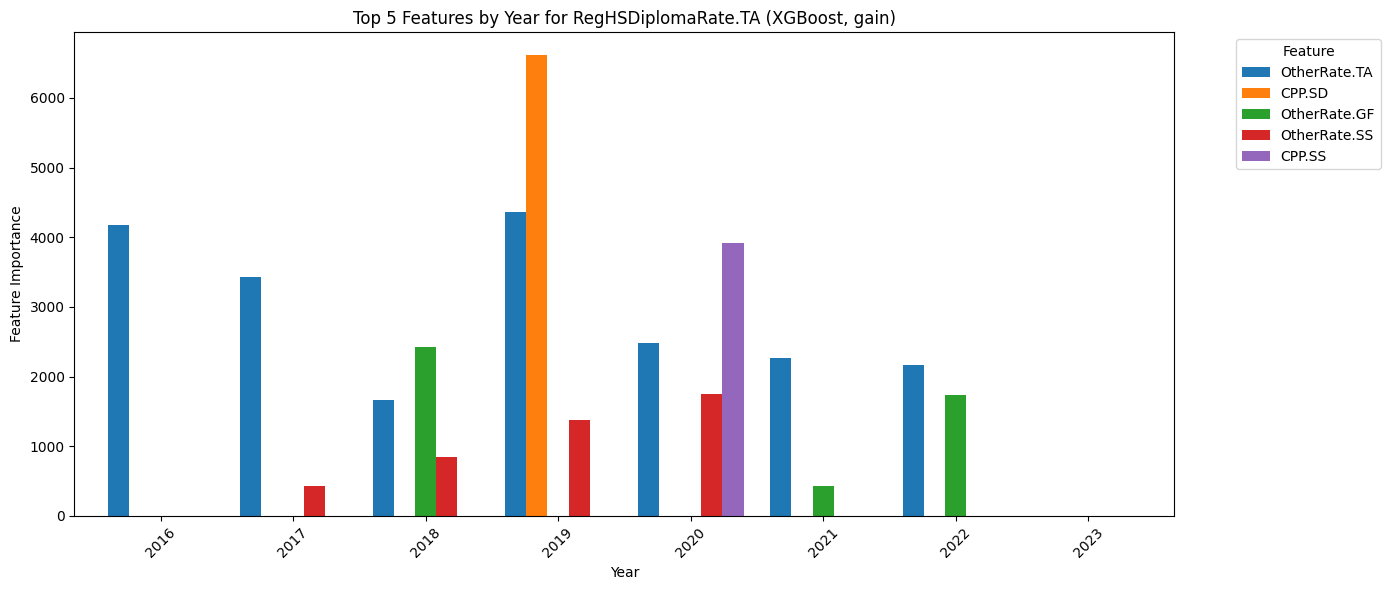

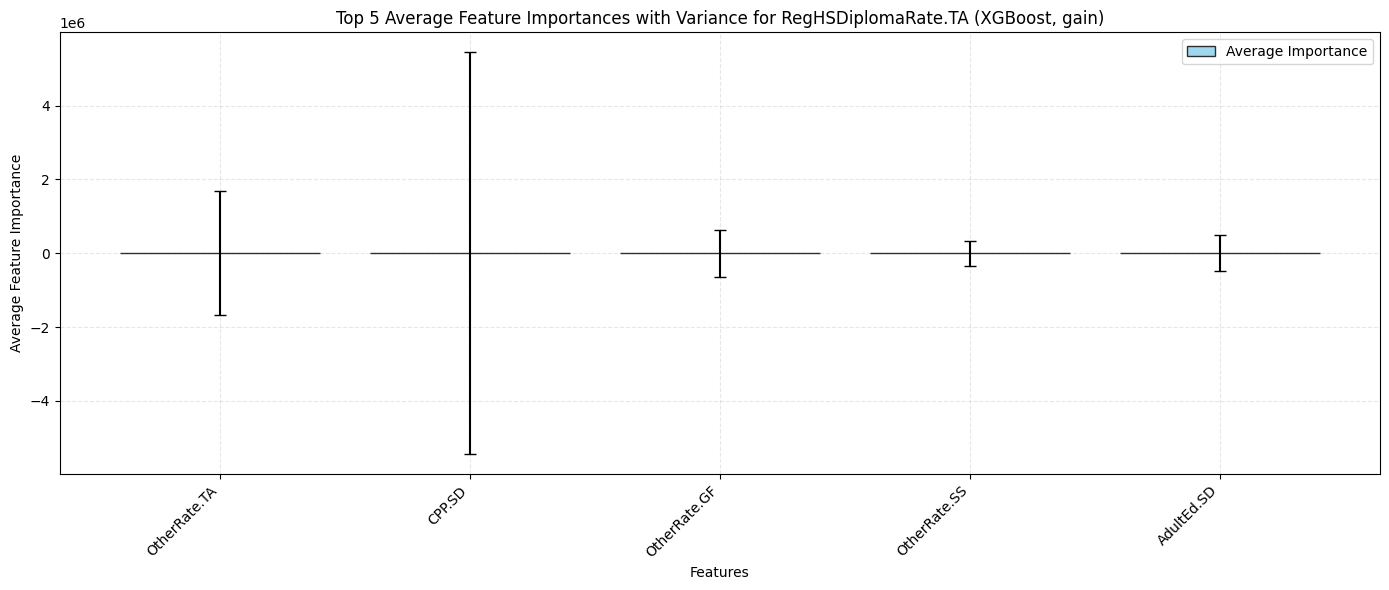

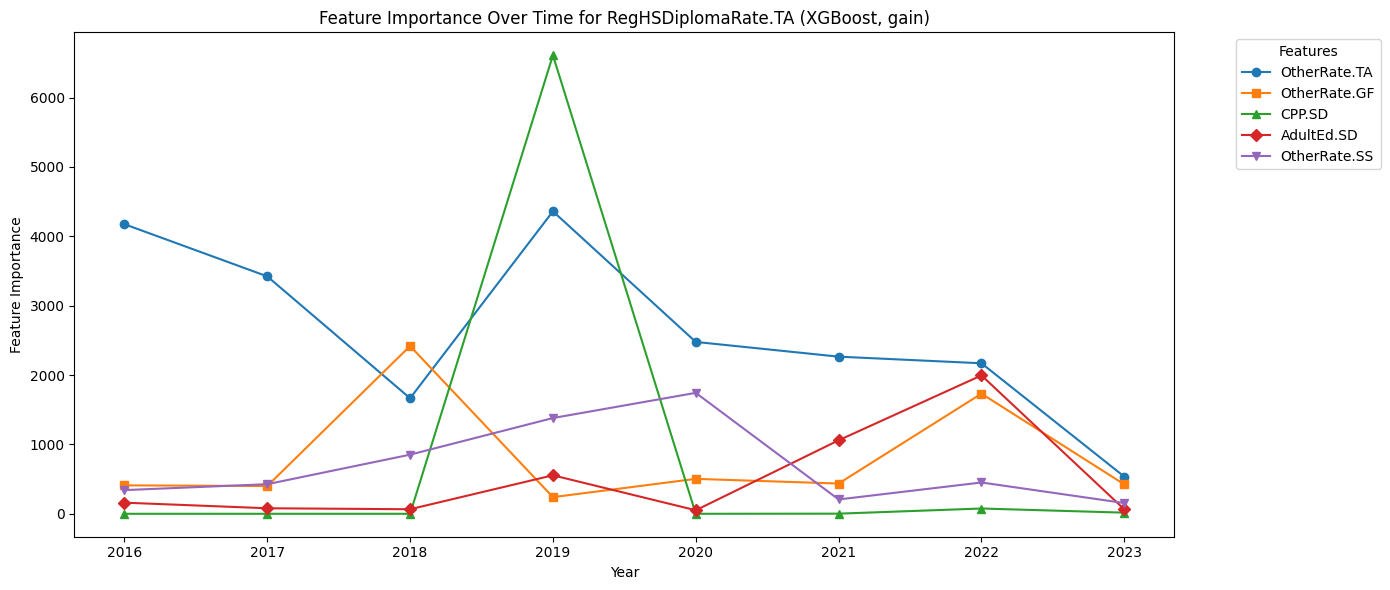

In [15]:
plot_top_k_features(cv_xgb_models, "XGBoost", "gain", target_column, k=5)
plot_feature_avg_variance(cv_xgb_models, "XGBoost", "gain", target_column)
plot_feature_time_series(cv_xgb_models, "XGBoost", "gain", target_column, top_features)

### Cross-Validated CSU/UC Readiness Rate


In [16]:
from modeling.utils.xgboost import cross_validate_xgboost, plot_cv_feature_importance
from modeling.utils.xgboost import (
    plot_top_k_features,
    plot_feature_avg_variance,
    plot_feature_time_series,
)

cv_xgb_models = {}

target_column = "UniReqsPercent.TA"

for year, year_df in year_df_mapping.items():

    cv_result = cross_validate_xgboost(
        df=year_df,
        target_column=target_column,
        columns_to_drop=[target_column, "Year"] + csu_rate_columns_to_drop,
        n_splits=5,
        print_results=True,
        n_jobs=-1
    )

    cv_xgb_models[year] = cv_result


Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2016-17:
RMSE: 14.3372 ± 0.7482
MAE: 10.1136 ± 0.4011
R^2: 0.5662 ± 0.0564
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2017-18:
RMSE: 15.6193 ± 0.7926
MAE: 11.0471 ± 0.6792
R^2: 0.5051 ± 0.0536
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2018-19:
RMSE: 16.6937 ± 0.2861
MAE: 11.7729 ± 0.2212
R^2: 0.4269 ± 0.0531
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2019-20:
RMSE: 14.6664 ± 0.4628
MAE: 10.2511 ± 0.4260
R^2: 0.5649 ± 0.0688
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2020-21:
RMSE: 15.1503 ± 0.9664
MAE: 10.9385 ± 0.6438
R^2: 0.5387 ± 0.0243
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2021-22:
RMSE: 13.6193 ± 0.6271
MAE: 10.0644 ± 0.3682
R^2: 0.6338 ± 0.0168
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2022-23:
RMSE: 14.2881 ± 0.8917
MAE: 10.2819 ± 0.7206
R^2: 0.6198 ± 0.0623
Cross-Validation Results for UniReqsPercent.TA (

<Figure size 1400x600 with 0 Axes>

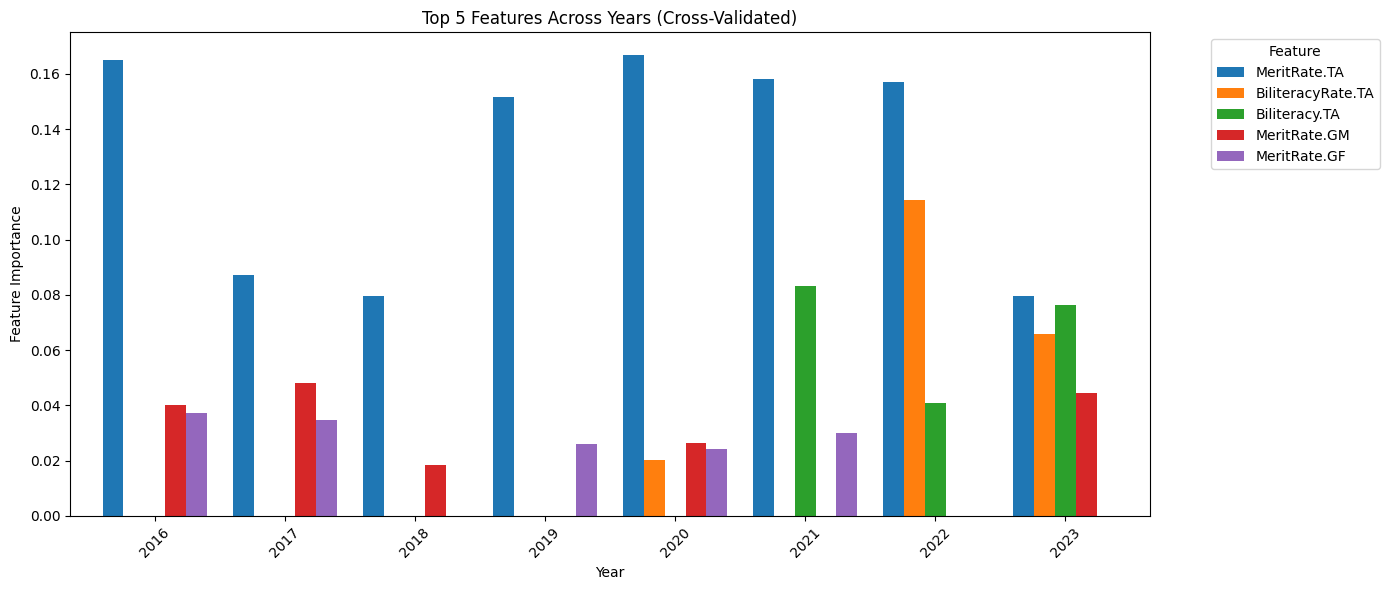

<Figure size 1400x600 with 0 Axes>

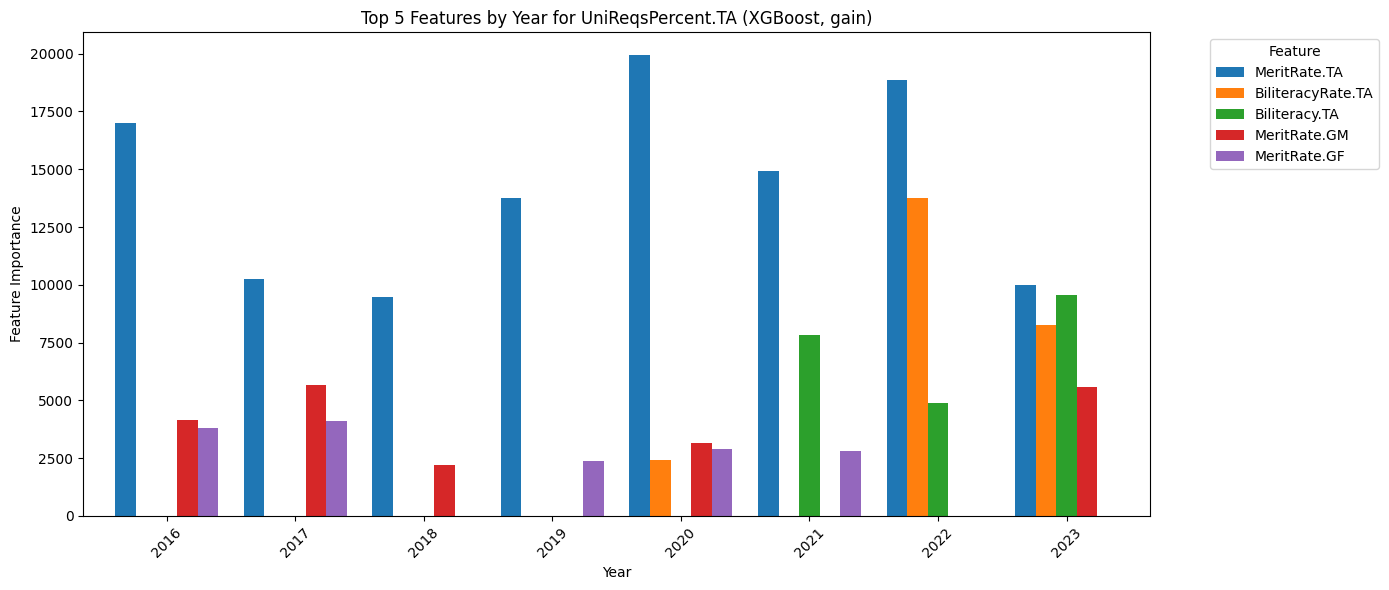

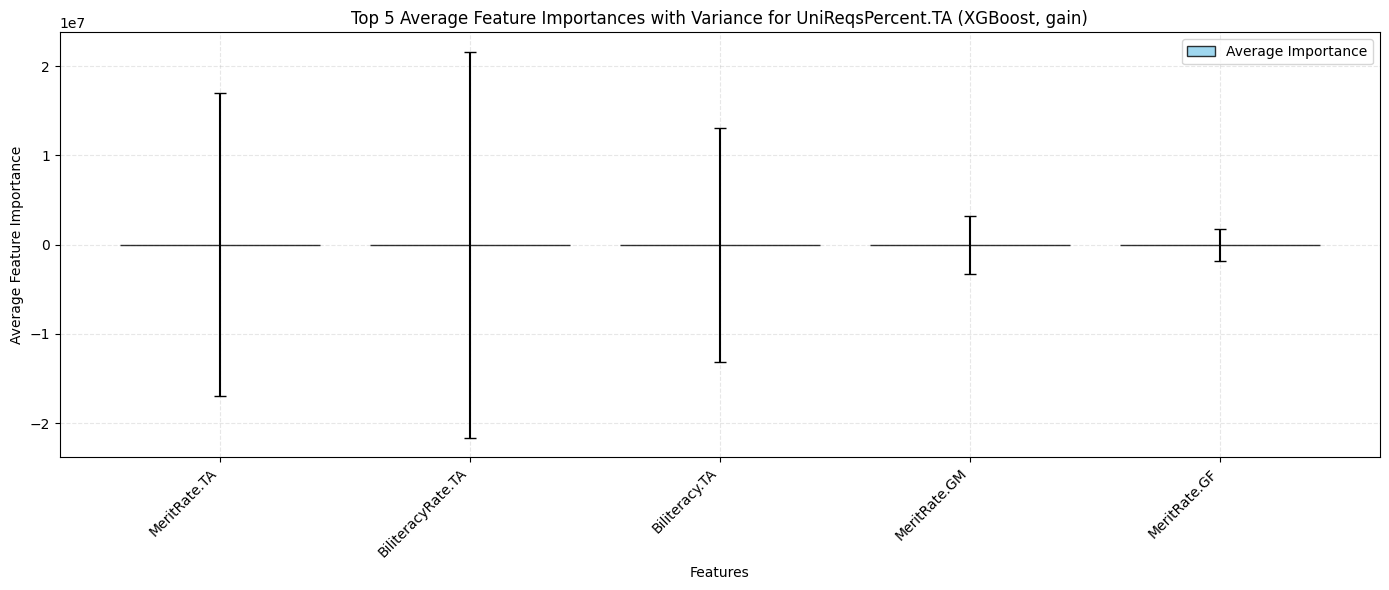

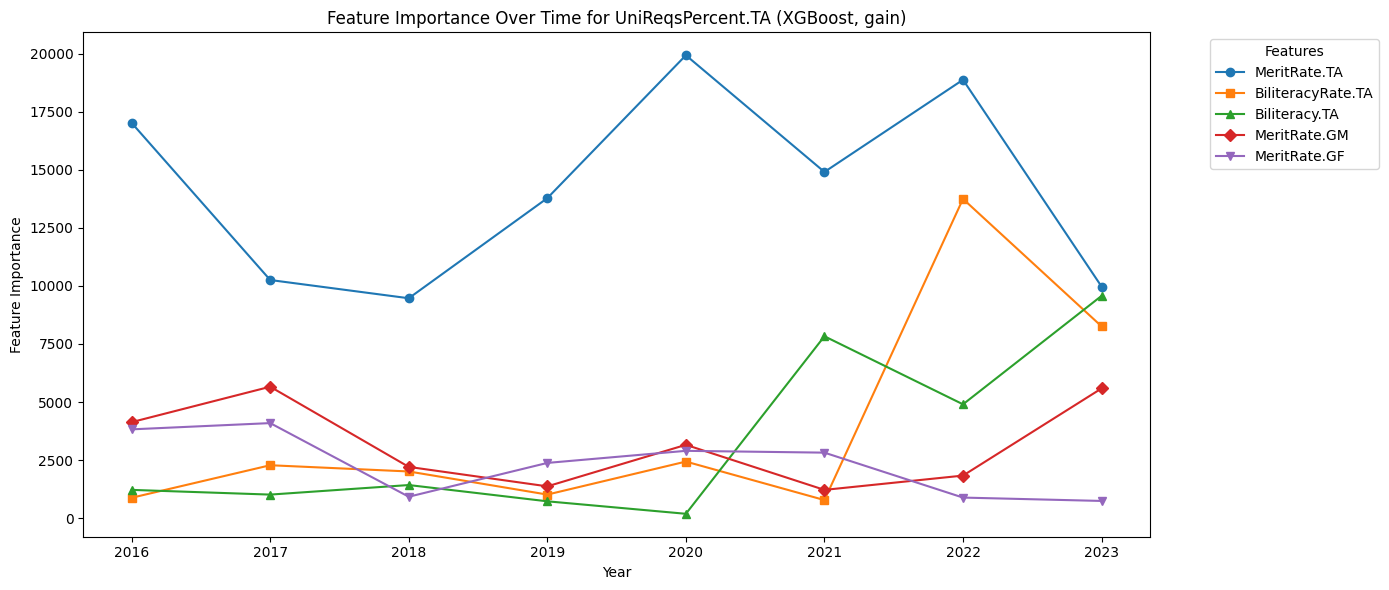

In [17]:
top_features = plot_cv_feature_importance(cv_xgb_models, top_n=5)
plot_top_k_features(cv_xgb_models, "XGBoost", "gain", target_column, k=5)
plot_feature_avg_variance(cv_xgb_models, "XGBoost", "gain", target_column)
plot_feature_time_series(
    cv_xgb_models, "XGBoost", "gain", target_column, top_features
)

## Random Forest


### Cross Validated Grad Rate


In [18]:
from modeling.utils.randomforest import (
    cross_validate_random_forest,
    plot_cv_feature_importance_rf,
    plot_top_k_features_rf,
    plot_feature_avg_variance_rf,
    plot_feature_time_series_rf,
)

cv_models = {}

target_variable = "RegHSDiplomaRate.TA"
years = list(year_df_mapping.keys())

for year in years:
    df = year_df_mapping[year]

    cv_result = cross_validate_random_forest(
        df=df,
        target_column=target_variable,
        columns_to_drop=grad_rate_columns_to_drop,
        n_splits=5,
        print_results=True,
        n_jobs=-1,
    )

    cv_models[year] = cv_result

Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2016-17:
RMSE: 6.9100 ± 0.7119
MAE: 2.9309 ± 0.2272
R²: 0.7518 ± 0.0465
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2017-18:
RMSE: 6.0744 ± 1.3374
MAE: 2.6453 ± 0.3142
R²: 0.7568 ± 0.0704
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2018-19:
RMSE: 6.2328 ± 1.9783
MAE: 2.5527 ± 0.3249
R²: 0.7220 ± 0.1114
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2019-20:
RMSE: 6.7541 ± 0.7301
MAE: 2.6699 ± 0.1468
R²: 0.7646 ± 0.0701
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2020-21:
RMSE: 6.6006 ± 1.5138
MAE: 2.7171 ± 0.2805
R²: 0.6389 ± 0.0931
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2021-22:
RMSE: 5.1363 ± 2.4119
MAE: 1.9038 ± 0.3240
R²: 0.7009 ± 0.2073
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2022-23:
RMSE: 6.6188 ± 0.8157
MAE: 2.4870 ± 0.1360
R²: 0.6459 ± 0.0614
Cross-Validation Results for RegHSDiplomaRate.TA (5 fol

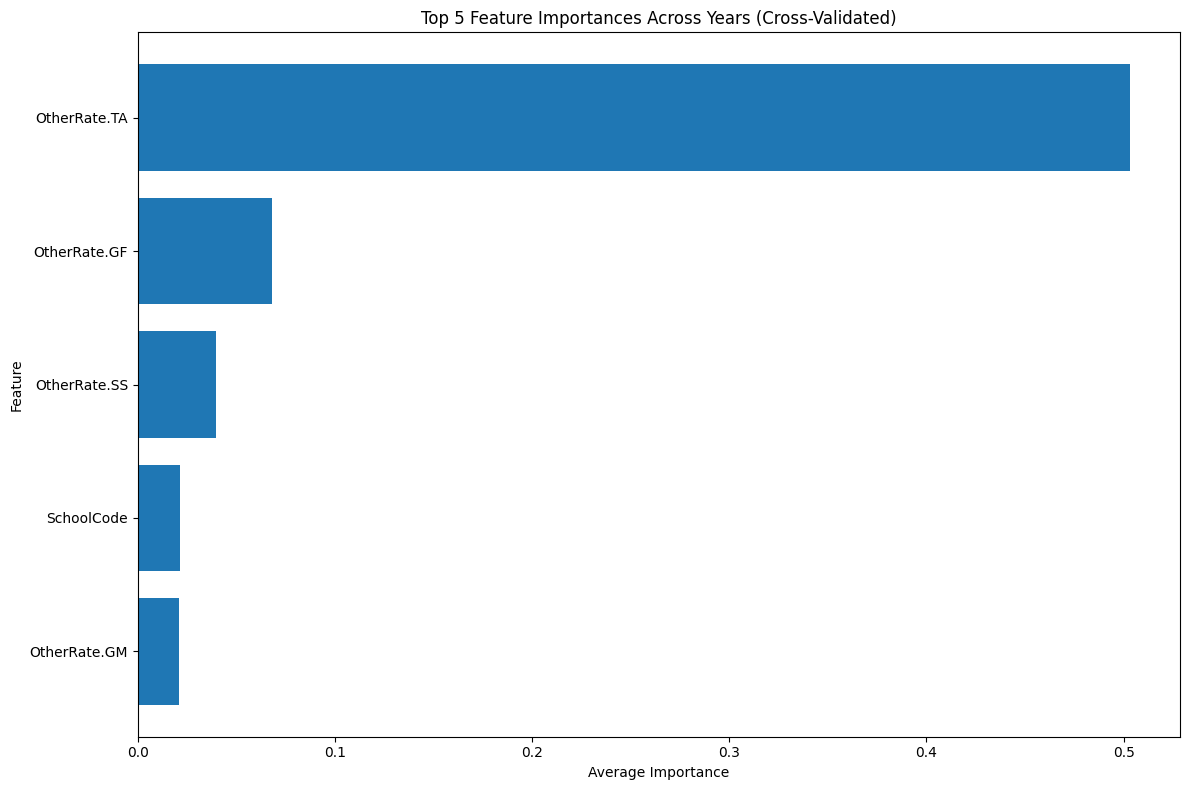

<Figure size 1400x600 with 0 Axes>

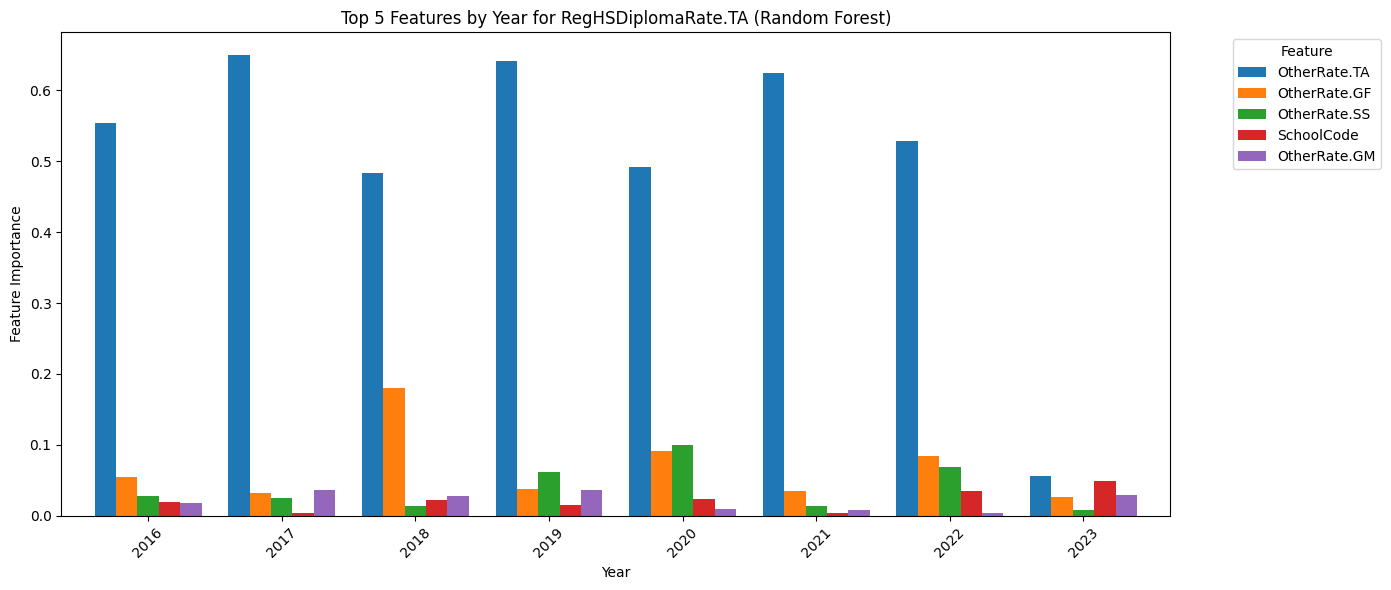

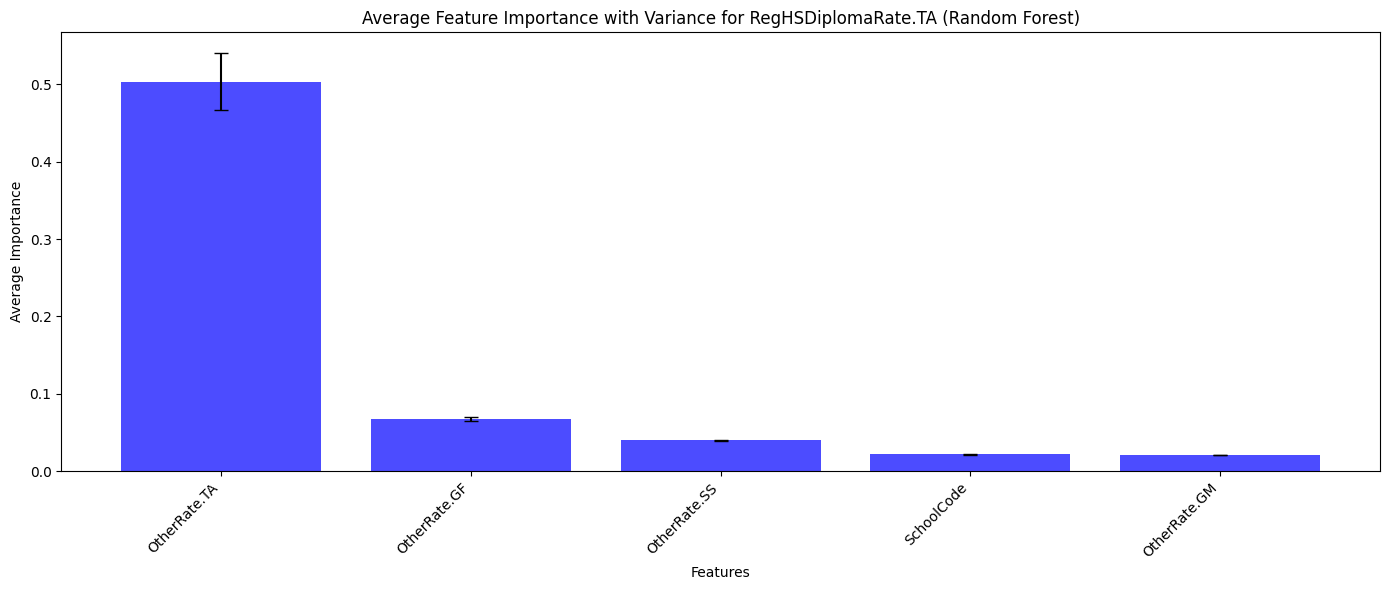

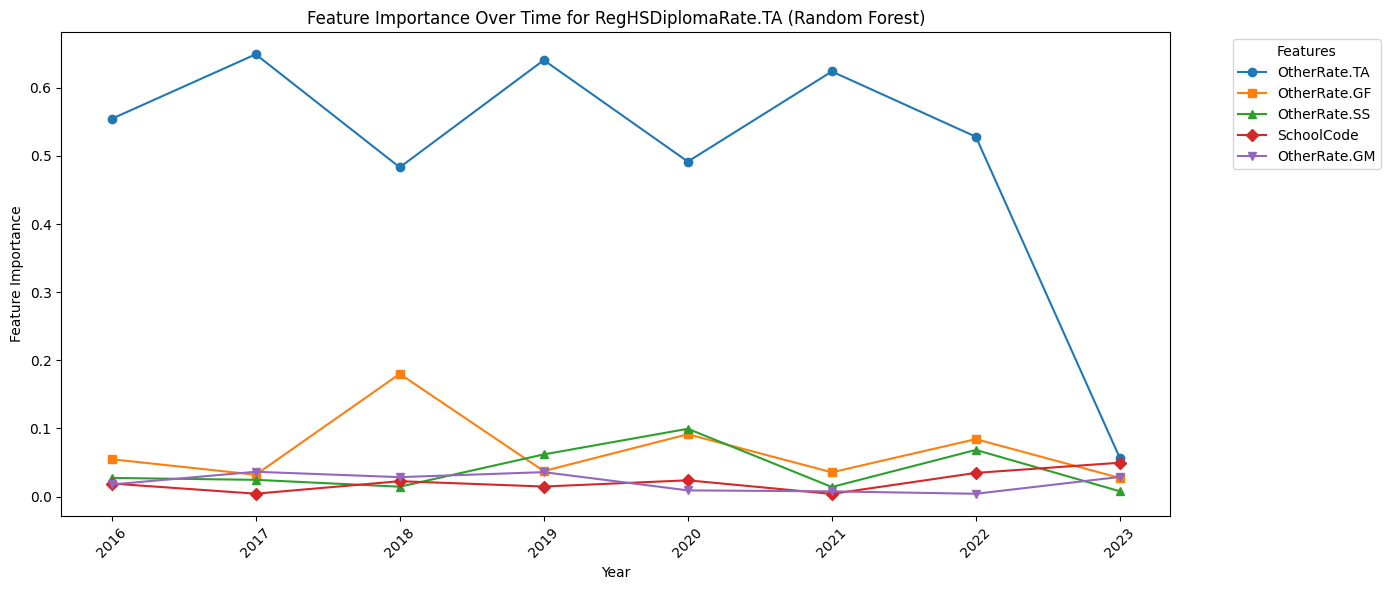

In [19]:
all_top_features = plot_cv_feature_importance_rf(cv_models, top_n=5)


plot_top_k_features_rf(cv_models, target_variable=target_variable, k=5)
plot_feature_avg_variance_rf(
    cv_models, target_variable=target_variable, top_k_features=all_top_features[:5]
)
plot_feature_time_series_rf(
    cv_models, target_variable=target_variable, top_k_features=all_top_features[:5]
)

### Cross Validated CSU/UC Readiness Rate


In [20]:
from modeling.utils.randomforest import (
    cross_validate_random_forest,
    plot_cv_feature_importance_rf,
    plot_top_k_features_rf,
    plot_feature_avg_variance_rf,
    plot_feature_time_series_rf,
)

cv_models = {}

target_variable = "UniReqsPercent.TA"
years = list(year_df_mapping.keys())

for year in years:
    df = year_df_mapping[year]

    cv_result = cross_validate_random_forest(
        df=df,
        target_column=target_variable,
        columns_to_drop=csu_rate_columns_to_drop,
        n_splits=5,
        print_results=True,
        n_jobs=-1,
    )

    cv_models[year] = cv_result

Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2016-17:
RMSE: 14.3097 ± 0.7747
MAE: 10.4440 ± 0.3167
R²: 0.5606 ± 0.0496
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2017-18:
RMSE: 15.6559 ± 0.9204
MAE: 11.3075 ± 0.5909
R²: 0.5018 ± 0.0644
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2018-19:
RMSE: 16.6423 ± 0.7431
MAE: 11.6735 ± 0.2150
R²: 0.4434 ± 0.0609
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2019-20:
RMSE: 14.6103 ± 0.8914
MAE: 10.5353 ± 0.3787
R²: 0.5510 ± 0.0825
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2020-21:
RMSE: 15.0488 ± 0.9674
MAE: 10.9550 ± 0.7289
R²: 0.5474 ± 0.0359
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2021-22:
RMSE: 13.6554 ± 0.3139
MAE: 10.0852 ± 0.3530
R²: 0.6330 ± 0.0190
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2022-23:
RMSE: 14.6431 ± 0.9865
MAE: 10.5909 ± 0.6389
R²: 0.6068 ± 0.0633
Cross-Validation Results for UniReqsPercent.TA (5 folds

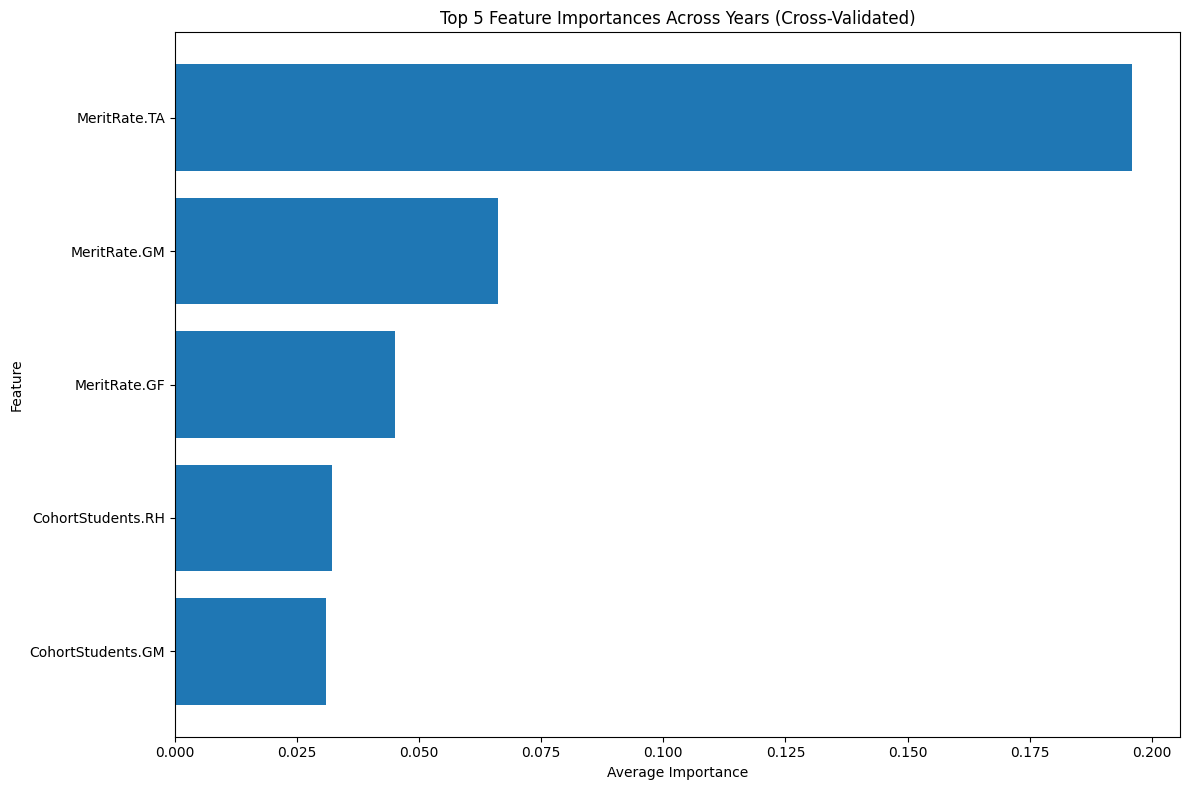

<Figure size 1400x600 with 0 Axes>

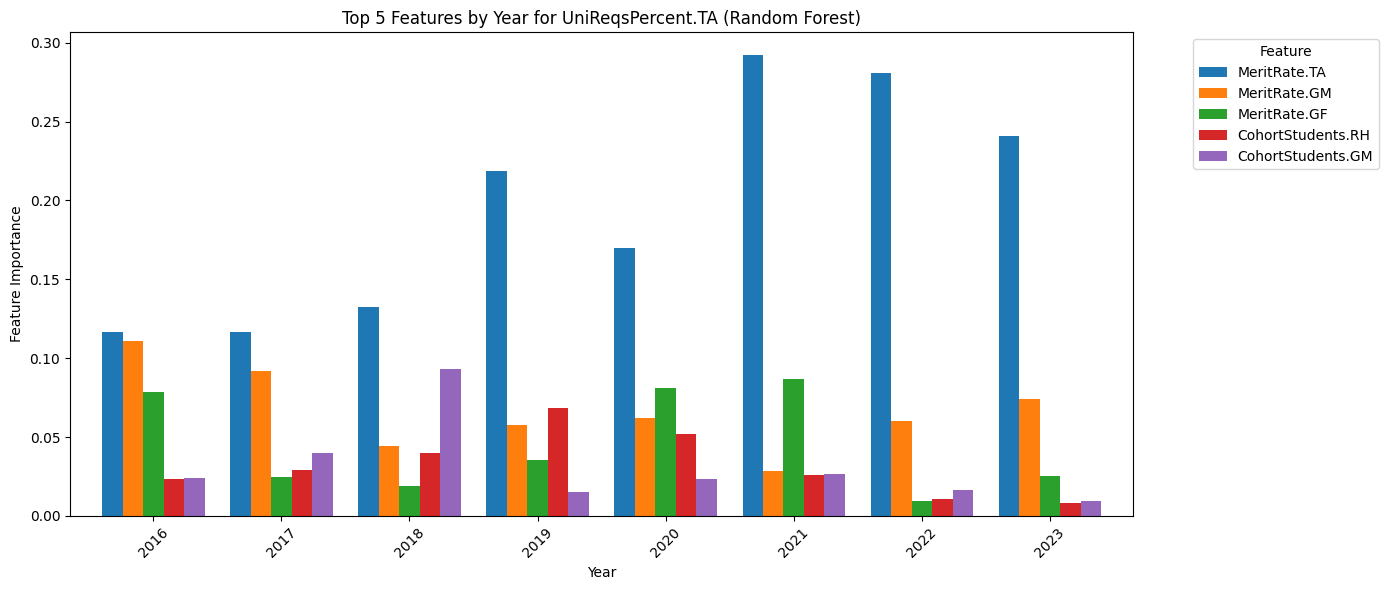

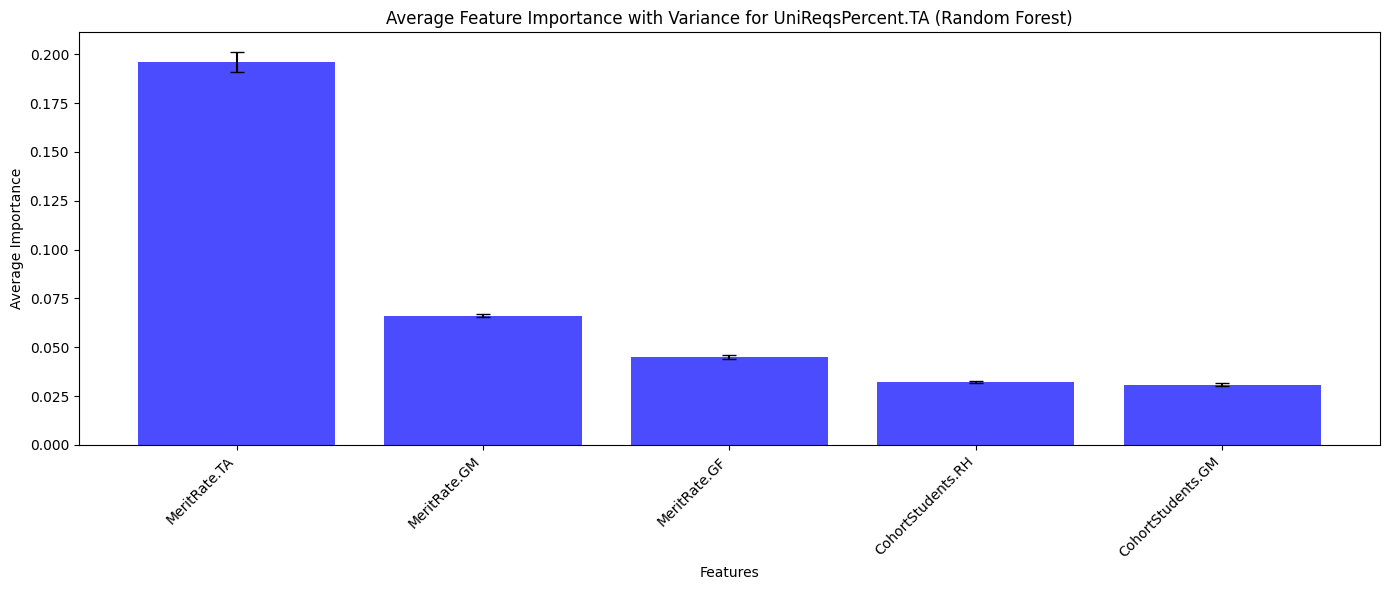

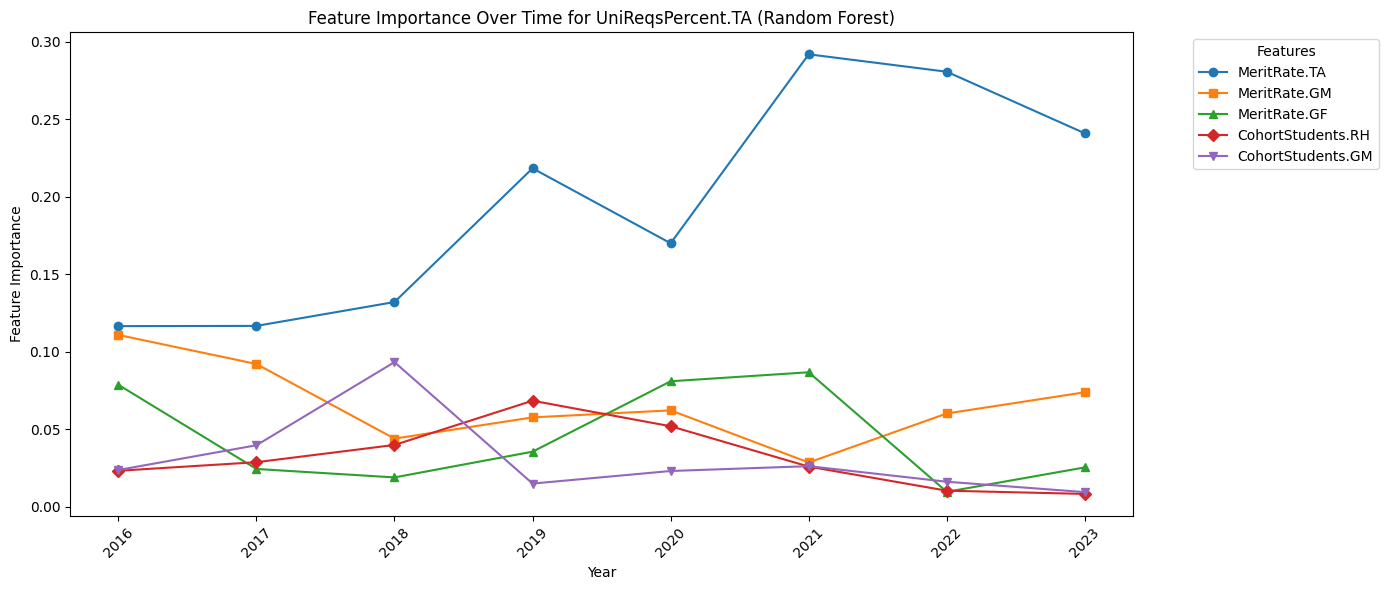

In [21]:
all_top_features = plot_cv_feature_importance_rf(cv_models, top_n=5)
plot_top_k_features_rf(cv_models, target_variable=target_variable, k=5)
plot_feature_avg_variance_rf(
    cv_models, target_variable=target_variable, top_k_features=all_top_features[:5]
)
plot_feature_time_series_rf(
    cv_models, target_variable=target_variable, top_k_features=all_top_features[:5]
)

### Close connection

In [22]:
con.close()